# Data Overview and Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('prosperLoanData.csv')
df_sub = df[['CreditGrade', 'Term', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', \
             'EmploymentStatus', 'EmploymentStatusDuration', 'CreditScoreRangeLower', \
             'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'LoanOriginalAmount']]
df_sub['AvgCreditScore'] = (df_sub.CreditScoreRangeLower + df_sub.CreditScoreRangeUpper) / 2
df_sub.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)

def x_cat_order(order_list, column, data):
    order = pd.api.types.CategoricalDtype(ordered=True, categories=order_list)
    data[column] = data[column].astype(order)
    
credit_grade_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
x_cat_order(credit_grade_order, 'CreditGrade', df_sub)
term_order = [12, 36, 60]
x_cat_order(term_order, 'Term', df_sub)
list_cat_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
x_cat_order(list_cat_order, 'ListingCategory (numeric)', df_sub)
emp_status_order = ['Not employed', 'Part-time', 'Self-employed', 'Full-time', 'Employed', 'Retired', 'Not available',  'Other']
x_cat_order(emp_status_order, 'EmploymentStatus', df_sub)

df_sub.shape

(113937, 10)

# Loan Summary
The APR of all the loans ranges between 0 and 0.5. The distribution follows closely with normal distribution with a peak around 0.36. For loan amount, there are peaks at \\$5000, \\$10000, \\$15000, \\$20000, and \\$25000. Lower amount of loan are more popular than higher amount of loans

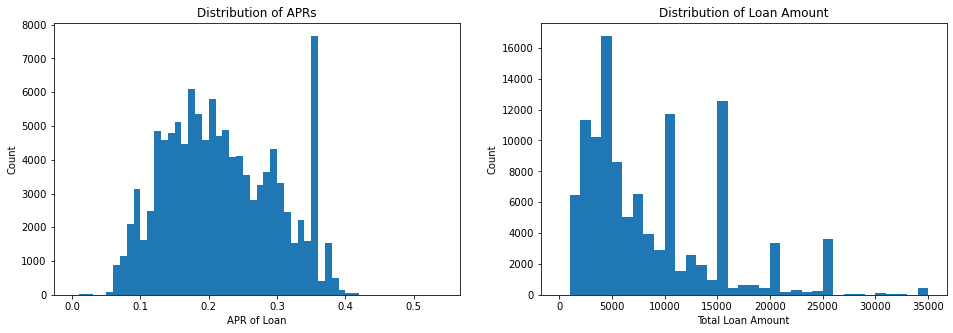

In [2]:
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(1, 2, figsize=(16, 5));
APR_bins = np.arange(0, df_sub.BorrowerAPR.max()+0.03, 0.01)
loan_amt_bin = np.arange(0, df_sub.LoanOriginalAmount.max() + 1000, 1000)
ax[0].hist(data=df_sub, x='BorrowerAPR', bins=APR_bins);
ax[0].set_ylabel('Count');
ax[0].set_xlabel('APR of Loan');
ax[0].set_title('Distribution of APRs');
ax[1].hist(data=df_sub, x='LoanOriginalAmount', bins=loan_amt_bin);
ax[1].set_ylabel('Count');
ax[1].set_xlabel('Total Loan Amount');
ax[1].set_title('Distribution of Loan Amount');

# Borrower Summary
Most borrowers have an average credit score (630-700), a monthly income of around \\$3000-\\$5000, and an average prosper score (4-8).

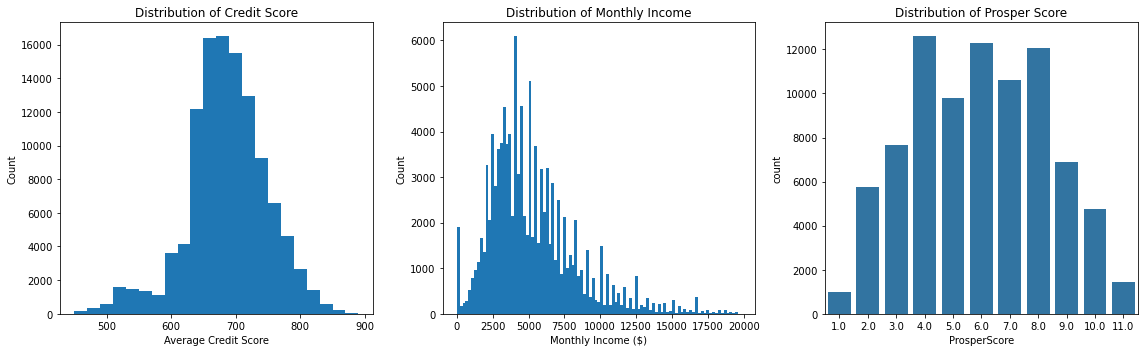

In [3]:
base_color = sb.color_palette()[0]
credit_score_bin = np.arange(450, df_sub.AvgCreditScore.max() + 5, 20)
income_bin = np.arange(0, 20000, 200)
loan_amt_bin = np.arange(0, df_sub.LoanOriginalAmount.max() + 1000, 1000)
fig, ax = plt.subplots(1, 3, figsize=(16, 5));

ax[0].hist(data=df_sub, x='AvgCreditScore', bins=credit_score_bin);
ax[0].set_xlabel('Average Credit Score');
ax[0].set_ylabel('Count');
ax[0].set_title('Distribution of Credit Score');
ax[1].hist(data=df_sub, x='StatedMonthlyIncome', bins = income_bin);
ax[1].set_xlabel('Monthly Income ($)');
ax[1].set_ylabel('Count');
ax[1].set_title('Distribution of Monthly Income');
sb.countplot(data=df_sub, x='ProsperScore', ax=ax[2], color=base_color);
ax[2].set_title('Distribution of Prosper Score');
fig.tight_layout();

# Borrower's Credit Score vs. APR
The APR of a loan negatively correlates with the credit score of the borrower.

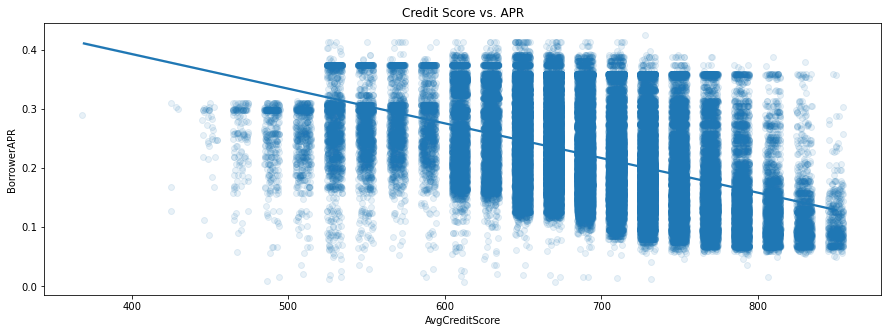

In [4]:
figure = plt.figure(figsize=(15, 5));
sb.regplot(x='AvgCreditScore', y='BorrowerAPR',\
           data=df_sub.query("AvgCreditScore >= 300 and AvgCreditScore <= 850 and StatedMonthlyIncome < 2e4"),\
                x_jitter=5, scatter_kws={'alpha':0.1});
plt.title('Credit Score vs. APR');

# Borrower's Prosper Score vs. APR
The APR of a loan negatively correlates with the prosper score of the borrower.

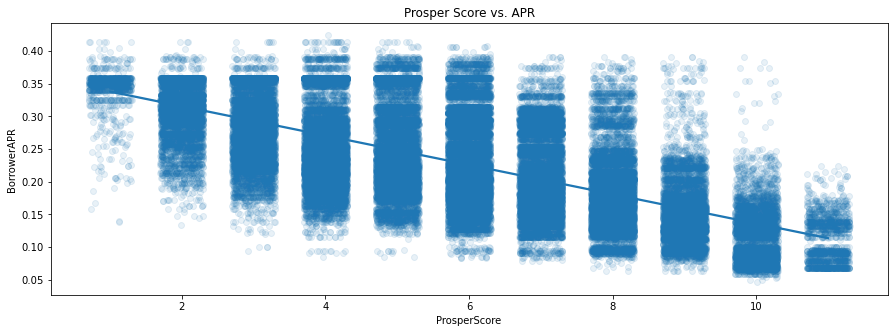

In [5]:
figure = plt.figure(figsize=(15, 5));
sb.regplot(x='ProsperScore', y='BorrowerAPR',\
           data=df_sub.query("AvgCreditScore >= 300 and AvgCreditScore <= 850 and StatedMonthlyIncome < 2e4"),\
                x_jitter=0.3, scatter_kws={'alpha':0.1});
plt.title('Prosper Score vs. APR');

# Borrower's Prosper Score vs. APR and Term
The APR of a loan negatively correlates with the prosper score of the borrower. For borrowers with prosper score lower than 8, the APR negatively correlates with the term of the loan; however, for borrowers with high prosper score (>= 8), the APR of longer term loans are higher than shorter terms. 

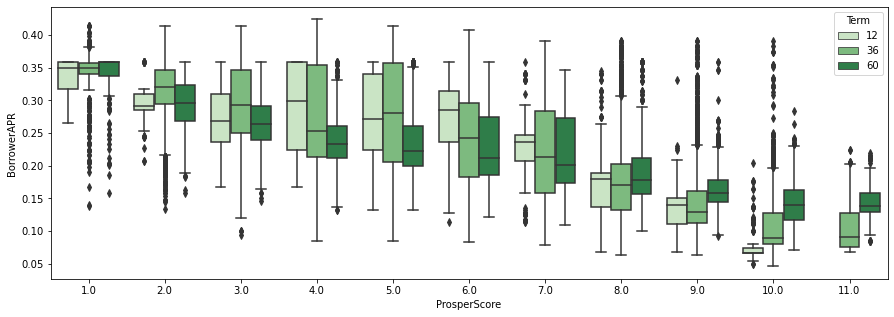

In [6]:
figure = plt.figure(figsize=(15, 5));
sb.boxplot(x='ProsperScore', y='BorrowerAPR',\
           data=df_sub, hue='Term', palette='Greens');

In [ ]:
!jupyter nbconvert Slide_deck.ipynb --to slides --post serve  --no-input --no-prompt